# Time Series

## Timestamps

`pandas` represeents an instant in time using the `pandas.Timestamp` class:

In [28]:
import pandas as pd

# Create a timestamp
pd.Timestamp(year=2025, 
             month=10, 
             day=16, 
             hour=9, 
             minute=56, 
             second=40)

Timestamp('2025-10-16 09:56:40')

In [29]:
# Notice the data type of the column is datetime64
pd.Series([pd.Timestamp(2020,10,18), 
           pd.Timestamp(2020,10,17),
           pd.Timestamp(2020,10,16)])

0   2020-10-18
1   2020-10-17
2   2020-10-16
dtype: datetime64[ns]

In [54]:
# Read in data 
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL)

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<Axes: >

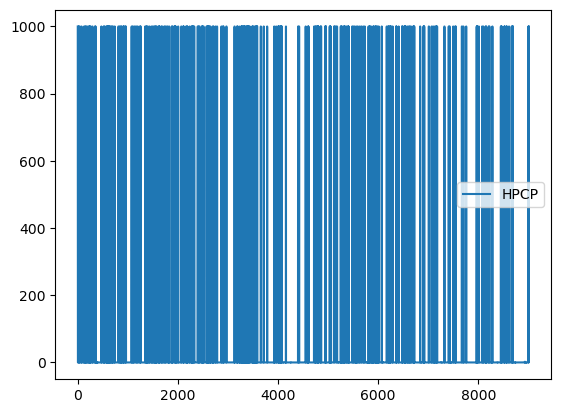

In [4]:
# Plot hourly precipitation in Boulder CO 
precip.plot()

## Reading in missing values

Metadata indicates missing values are 999.99
We can directly read in this value as an NA value using 'pd.read_csv'

In [46]:
# Read in CSV indicating NA values based on metadata
precip = pd.read_csv(URL, na_values=[999.99])

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<Axes: >

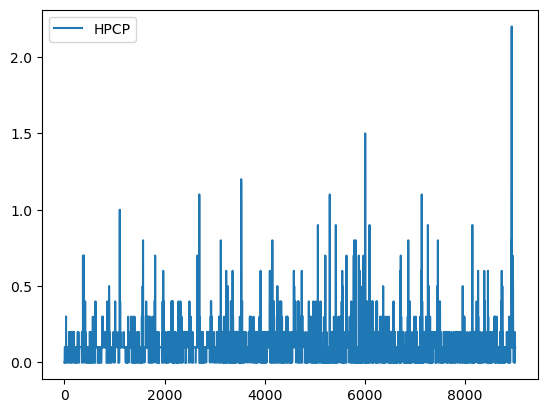

In [47]:
precip.plot()

In [34]:
#Notice 'Date' column in our df is not of type 'dateime':
#Check whether DATE column is of type datetime
precip.dtypes

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [35]:
# Convert DATE column to timestamps
pd.to_datetime(precip.DATE)

0      2000-01-01 00:00:00
1      2000-01-01 01:00:00
2      2000-01-02 20:00:00
3      2000-01-03 01:00:00
4      2000-01-03 05:00:00
               ...        
9001   2013-12-22 01:00:00
9002   2013-12-23 00:00:00
9003   2013-12-23 02:00:00
9004   2013-12-29 01:00:00
9005   2013-12-31 00:00:00
Name: DATE, Length: 9006, dtype: datetime64[ns]

In [45]:
# Convert DATE column to timestamps
precip.DATE = pd.to_datetime(precip.DATE)

# Check DATE column data type is updated
print(precip.dtypes)

# Check new values
precip.DATE.head()

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
Date                datetime64[ns]
dtype: object


0   2000-01-01 00:00:00
1   2000-01-01 01:00:00
2   2000-01-02 20:00:00
3   2000-01-03 01:00:00
4   2000-01-03 05:00:00
Name: DATE, dtype: datetime64[ns]

In [43]:
precip['Date'] = pd.to_datetime(precip.DATE)

#check date column to see if updated
precip.dtypes

STATION                     object
STATION_NAME                object
DATE                        object
HPCP                       float64
Measurement Flag            object
Quality Flag                object
Date                datetime64[ns]
dtype: object

<Axes: xlabel='DATE'>

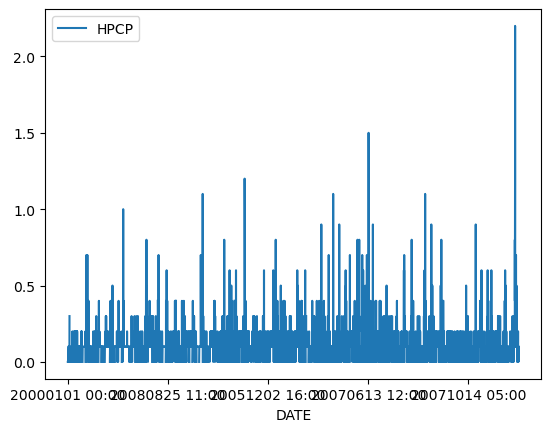

In [48]:
precip.plot(x='DATE', y='HPCP')

In [49]:
# Set DATE coumn as index
precip = precip.set_index('DATE')

# Inspect new index
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
20000101 00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
20000101 01:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
20000102 20:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
20000103 01:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
20000103 05:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


<Axes: xlabel='DATE'>

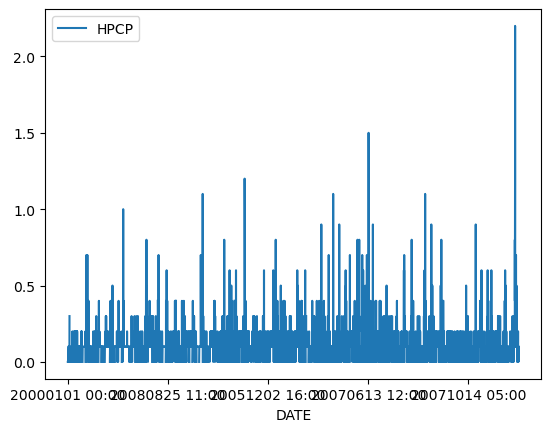

In [50]:
precip.plot()

In [58]:
## Read in dataset in specific format
precip = pd.read_csv(URL,
                    na_values=[999.99],
                    index_col=['DATE'],
                    parse_dates=['DATE'])

precip.head()
#df = pd.read_csv(file, index_col=['index_column'])

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


In [64]:
df = pd.read_csv(URL, index_col=['DATE'], parse_dates=['DATE'])

# Subsetting by Date

We can use loc to subset data

In [69]:
# Select precipitation data from September 2013
precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


In [70]:
# Select 2013 precipitation data
precip.loc['2013']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2013-01-10 02:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-01-13 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-01-26 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
2013-01-28 23:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<Axes: xlabel='DATE'>

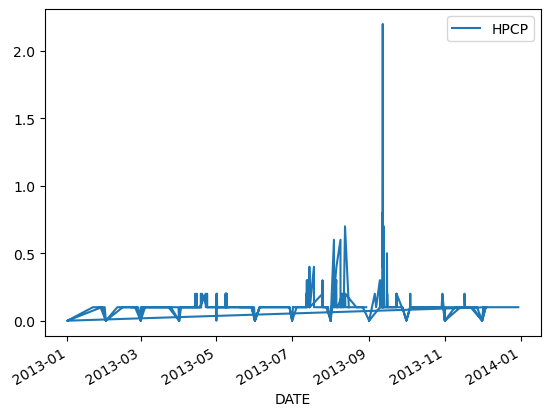

In [71]:
precip.loc['2013'].plot()

# Resample

Resampling a time series means converting a time series from one frequency to another. For example, monthly to yearly (downsampling) or weekly to daily (unsampling)

We can resample with the 'resample()' method. The syntax is to call

```
df.resample(new_frequency).aggregator_function()
```

where:

- 'new freq': is a string representing the new frequency to resample the data: D for day, w for week and y for year, m for month
-`aggregator_function()`: is the function we will use to affregate the data into the new frewuency. For example, 'max', 'min', 'sum', 'average'.

### Example

Our 2013 precipitation data has hourly frequnency, we want to resample it to daily frequency (downsampling)

In [72]:
# resample 2013 hourly data to daily frequency
precip.loc['2013'].resample('D').sum()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01,COOP:050183COOP:055881COOP:050183COOP:055121CO...,ALLENSPARK 2 SE CO USNEDERLAND 5 NNW CO USALLE...,0.0,]g[gg,
2013-01-02,0,0,0.0,0,0
2013-01-03,0,0,0.0,0,0
2013-01-04,0,0,0.0,0,0
2013-01-05,0,0,0.0,0,0
...,...,...,...,...,...
2013-12-27,0,0,0.0,0,0
2013-12-28,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
2013-12-29,COOP:050843,BOULDER 2 CO US,0.0,[,


In [21]:
# Resample 2013 hourly data to daily frequency: no output
precip.loc['2013'].resample('D')

In [73]:
# Total daily precipitation in 2013
daily_precip_2013 = precip.loc['2013'].resample('D').sum()
#daily_precip_2013.head(3)

<Axes: title={'center': 'Precipitation in Boulder, CO'}, xlabel=' ', ylabel='daily precip (in)'>

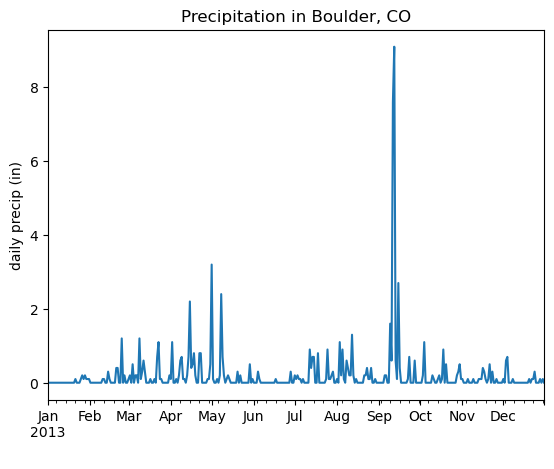

In [76]:
daily_precip_2013.plot(ylabel = "daily precip (in)",
                      xlabel = ' ',
                      title = "Precipitation in Boulder, CO",
                      legend = False)

In [23]:
# Rename hourly precipitation column to match resample
daily_precip_2013 = daily_precip_2013.rename(columns={'HPCP':'daily_precipitation'})
daily_precip_2013.columns

Index(['STATION', 'STATION_NAME', 'daily_precipitation', 'Measurement Flag',
       'Quality Flag'],
      dtype='object')

<Axes: title={'center': 'Precipitation in Boulder, CO during 2013'}, xlabel=' ', ylabel='daily precipitation (in)'>

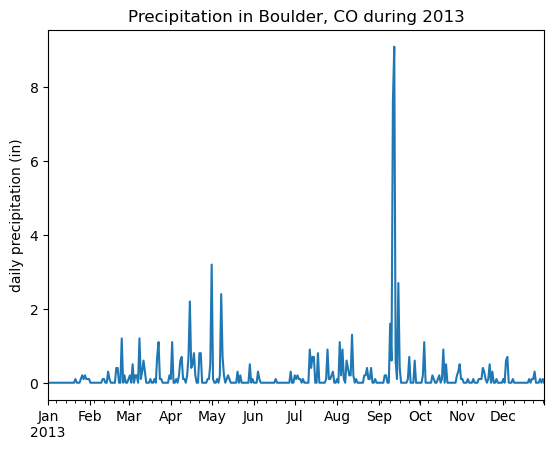

In [24]:
daily_precip_2013.plot(ylabel='daily precipitation (in)', 
                       xlabel=' ',
                       title='Precipitation in Boulder, CO during 2013',
                       legend=False)

# Complete Workflow

<Axes: title={'center': 'Precipitation in Boulder, CO during 2013'}, xlabel=' ', ylabel='daily precipitation (in)'>

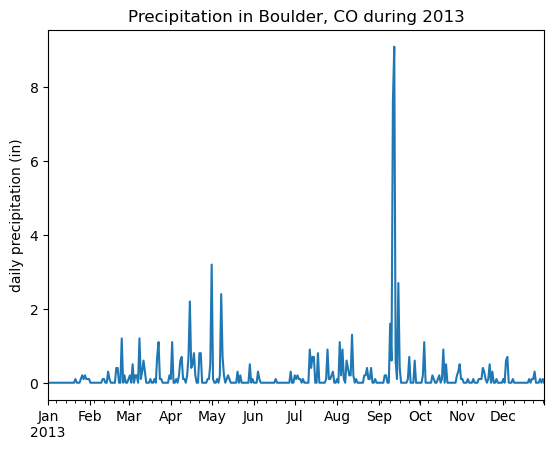

In [77]:
import pandas as pd

'''
Read in Boulder, CO hourly precipitation data 
HPCP = hourly precipitation (unique numerical column in data frame)
'''
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL, 
                    na_values=[999.99],  # Known from metadata
                    index_col=['DATE'], 
                    parse_dates=['DATE']
                    )


# Calculate daily total precipitation during 2013
daily_precip_2013 = (precip.loc['2013']
                            .resample('D')
                            .sum()
                            .rename(columns={'HPCP':'daily_precipitation'})  
                            )

# Plot time series
daily_precip_2013.plot(ylabel='daily precipitation (in)', 
                       xlabel=' ',
                       title='Precipitation in Boulder, CO during 2013',
                       legend=False)